## Step 1: Load and Prepare Data

In this step, we load the cleaned retail dataset from CSV, assign meaningful column names, and create a new column `TotalPrice` by multiplying `Quantity` and `UnitPrice`.


In [54]:
!pip install wordcloud

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [58]:
# Load dataset 
df = pd.read_csv("cleaned_retail.csv", header=None)

# Assign column names
df.columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity',
              'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

# Create total sales column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## Step 2: Total Sales by Country

We group the transactions by country and calculate total revenue for each one. A vertical bar chart is used to visualize which countries contribute the most to total sales.


In [26]:
print("Total Revenue: £", round(df['TotalPrice'].sum(), 2))
print("Total Quantity Sold:", df['Quantity'].sum())
print("Number of Countries:", df['Country'].nunique())
print("Time Range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())

Total Revenue: £ 3857169.48
Total Quantity Sold: 2026173
Number of Countries: 36
Time Range: 1/10/2011 10:32 to 5/9/2011 9:47


## Step 3: Monthly Sales Trend

We convert the invoice date into monthly periods and then analyze how total sales vary over time. The line chart below helps identify sales trends and possible seasonal peaks.


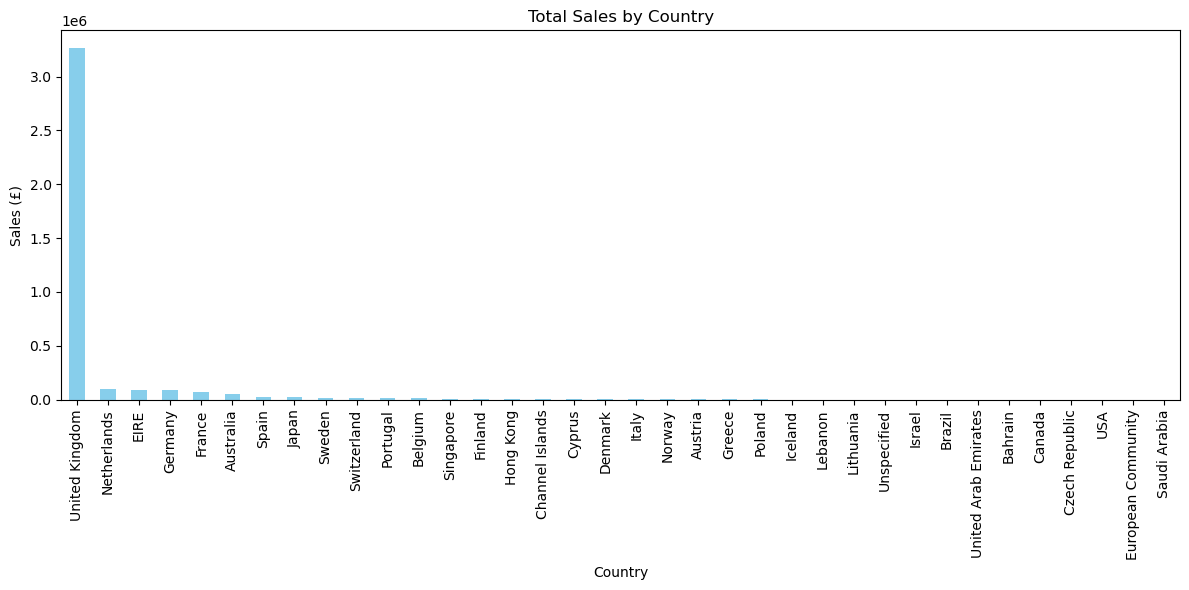

In [75]:
country_sales = df.groupby("Country")['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='skyblue', title='Total Sales by Country')
plt.ylabel("Sales (£)")
plt.xlabel("Country")
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

## Step 4: Top 10 Products by Sales

This section highlights the most profitable products in the dataset based on total revenue. A horizontal bar chart ranks the top 10 products.


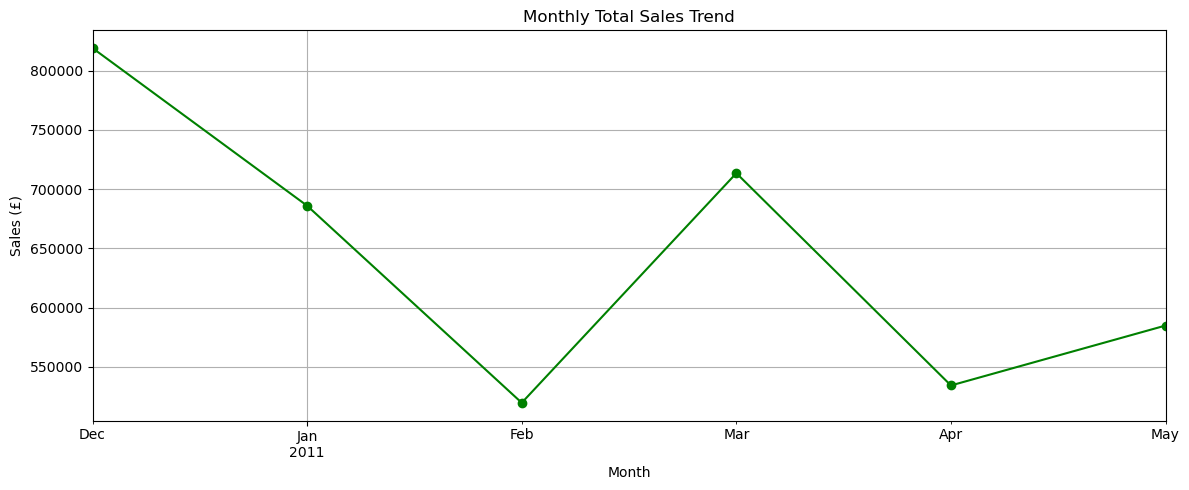

In [78]:
# Convert InvoiceDate to datetime and extract month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', color='green', title='Monthly Total Sales Trend')
plt.ylabel("Sales (£)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 5: Word Cloud of Product Descriptions

We use a word cloud to visualize the most frequently occurring words in the product descriptions. This reveals dominant product themes or common keywords in the inventory.


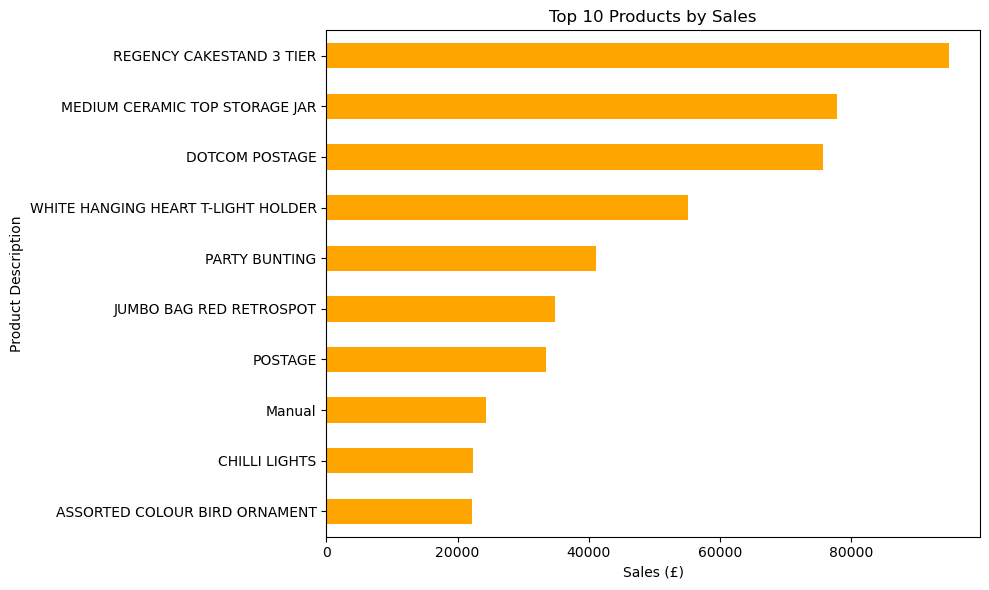

In [81]:
# Group by product description and calculate total sales
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='orange', title='Top 10 Products by Sales')
plt.xlabel("Sales (£)")
plt.ylabel("Product Description")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

## Step 6: Summary and Insights

From this analysis, we found:
- The United Kingdom is the dominant customer base.
- Sales volume shows fluctuation across months, indicating seasonal influence.
- Certain products significantly outperform others in sales.
- Word cloud analysis reveals popular terms like "SET", "HEART", and "BAG", suggesting common product types.

These findings can support decisions in marketing focus, inventory planning, and customer segmentation strategies.


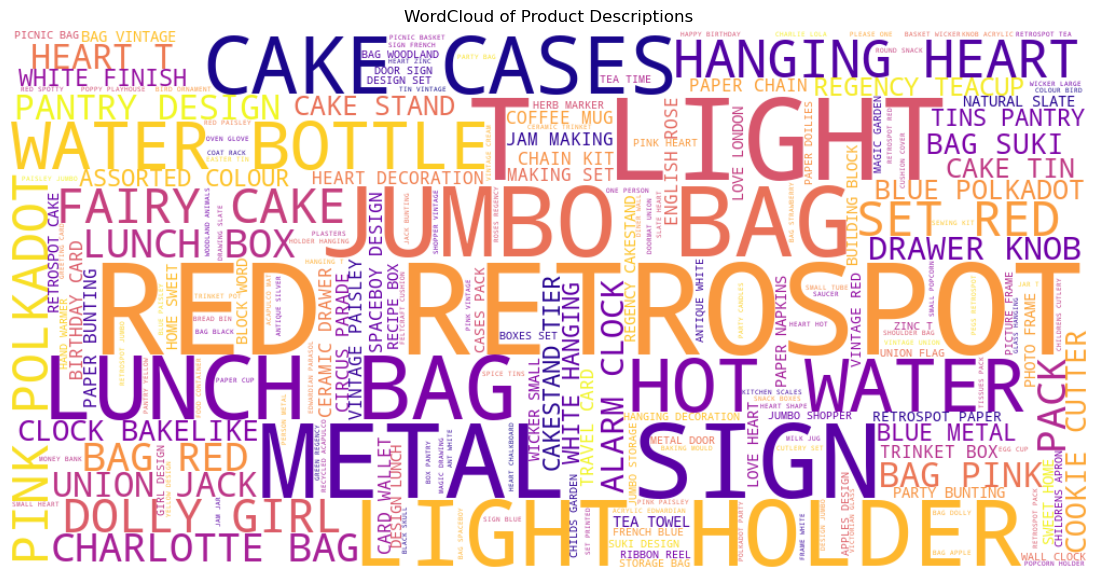

In [84]:
from wordcloud import WordCloud

# Combine all product descriptions into one string
text = " ".join(df['Description'].dropna().astype(str).tolist())

# Create and display the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='plasma').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Product Descriptions")
plt.show()